In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import sys

sys.path.append(os.path.realpath('../src/data/'))
from sb_utils import save_file

from pandas_profiling import ProfileReport

### Import Data
Import the raw data from `data > raw` and write it out to the `data > interim directory`. We'll work from the interim folder.

In [2]:
# the supplied CSV data file is the raw_data directory
aqi_df = pd.read_csv('../data/raw/aqi_yearly_1980_to_2021.csv')
aqi_df.shape

(34186, 21)

In [3]:
cali = aqi_df[aqi_df['State'] == 'California']

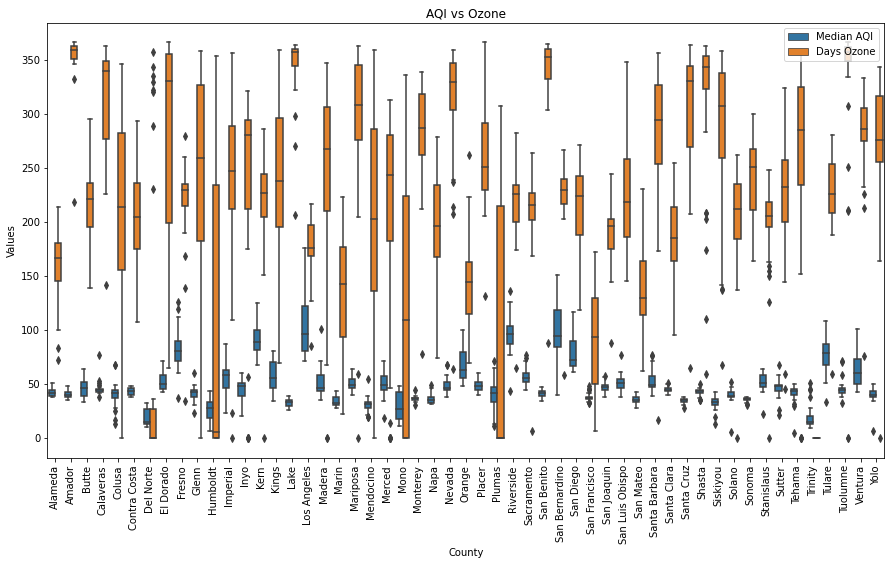

In [4]:
# melt to give us County vs Median AQI, Days Ozone
temp = pd.melt(cali[['County', 'Median AQI', 'Days Ozone']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days Ozone'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('AQI vs Ozone')
plt.legend(loc='upper right');

Median AQI nearly always lags behind the median Ozone value. Beyond that, its difficult to see any linear relationship here (perhaps because of CO measure variance). Still, this merits further exploration in the EDA stage.

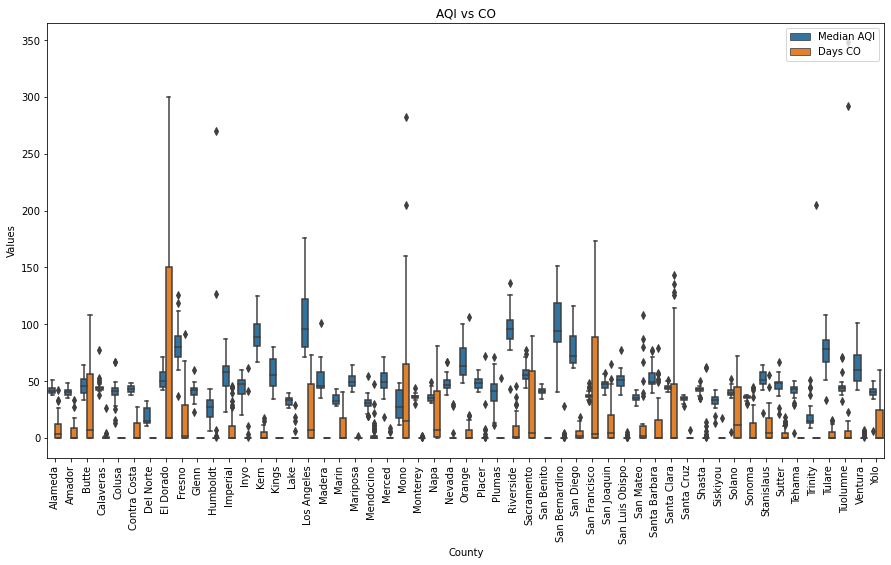

In [5]:
# melt to give us County vs Median AQI, Days CO
temp = pd.melt(cali[['County', 'Median AQI', 'Days CO']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days CO'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('AQI vs CO')
plt.legend(loc='upper right');

The median AQI always exceeds the median of the CO values. There does _seem_ to be a linear relationship here.

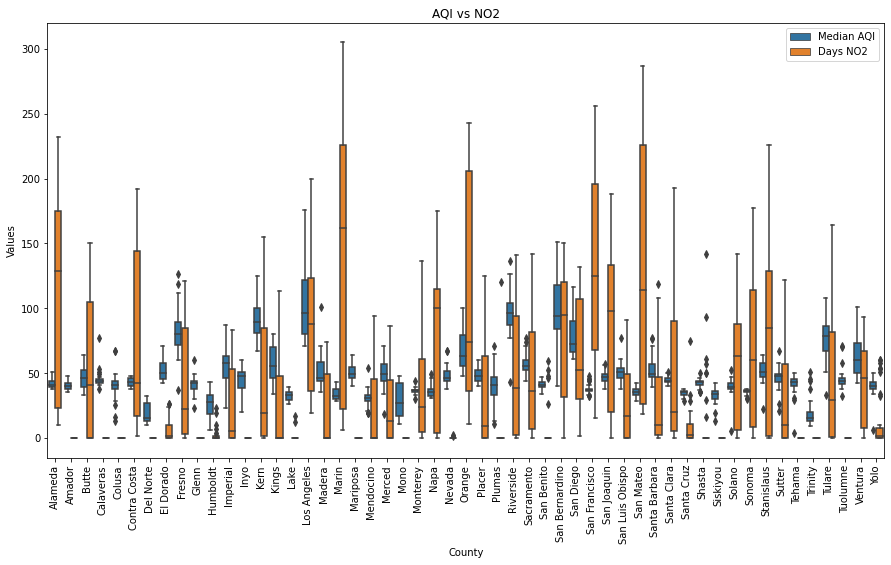

In [6]:
# melt to give us County vs Median AQI, Days NO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days NO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days NO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('AQI vs NO2')
plt.legend(loc='upper right');

NO2 values have high variance, but seem to either be below the median AQI or equal to it (for the most part). Correlations should be explored in EDA phase.

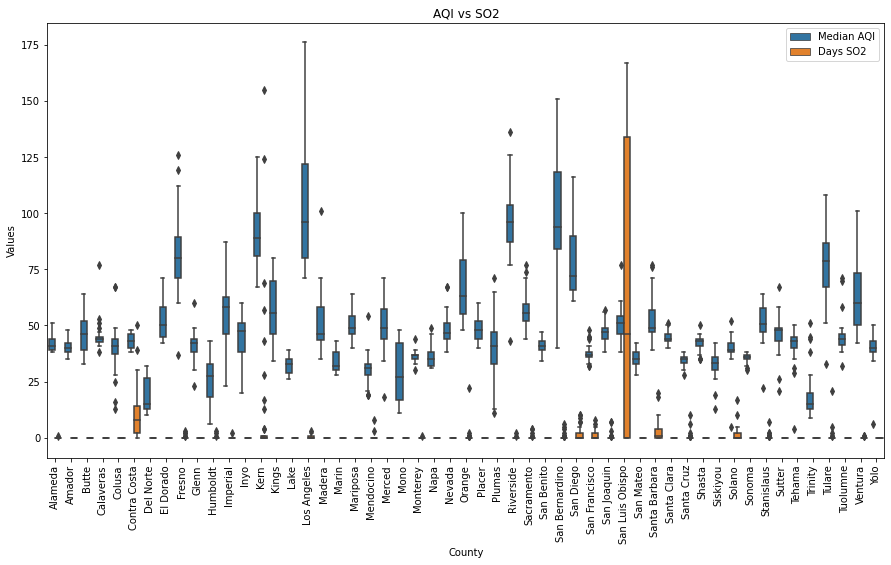

In [7]:
# melt to give us County vs Median AQI, Days SO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days SO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days SO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('AQI vs SO2')
plt.legend(loc='upper right');

The median for Days SO2 always stays below the median AQI. Not a lot of variance in SO2 values, but that is likely because there are so few days of measurable SO2. I doubt that this feature will be predictive of AQI.

Lets take a look at the mean of all the values above against the AQI

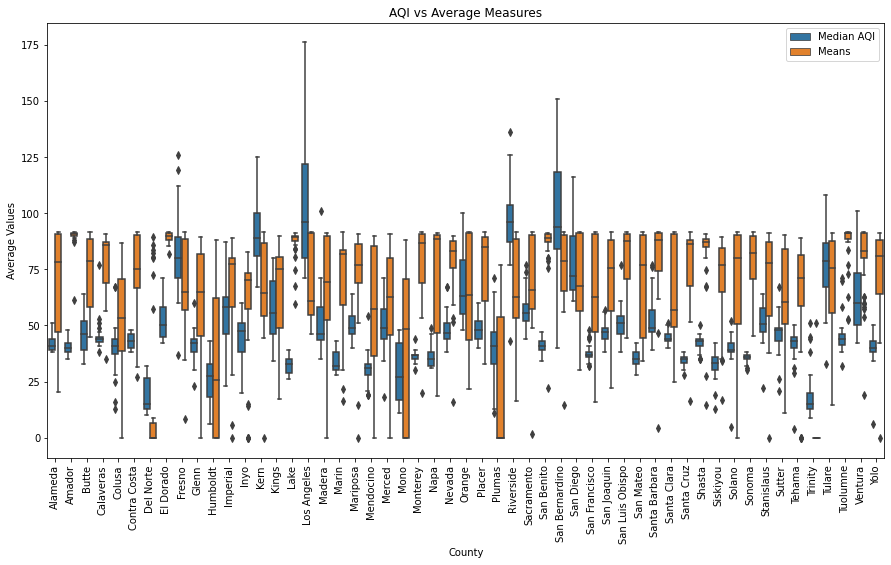

In [8]:
temp = cali[['County', 'Median AQI']].copy()
mean_measures = cali.loc[:,['Days CO', 'Days NO2', 'Days Ozone', 'Days SO2']].mean(axis=1)
temp.loc[:, 'Means'] = mean_measures

temp = pd.melt(temp[['County', 'Median AQI', 'Means']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Means'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Average Values')
plt.xlabel('County')
plt.title('AQI vs Average Measures')
plt.legend(loc='upper right');

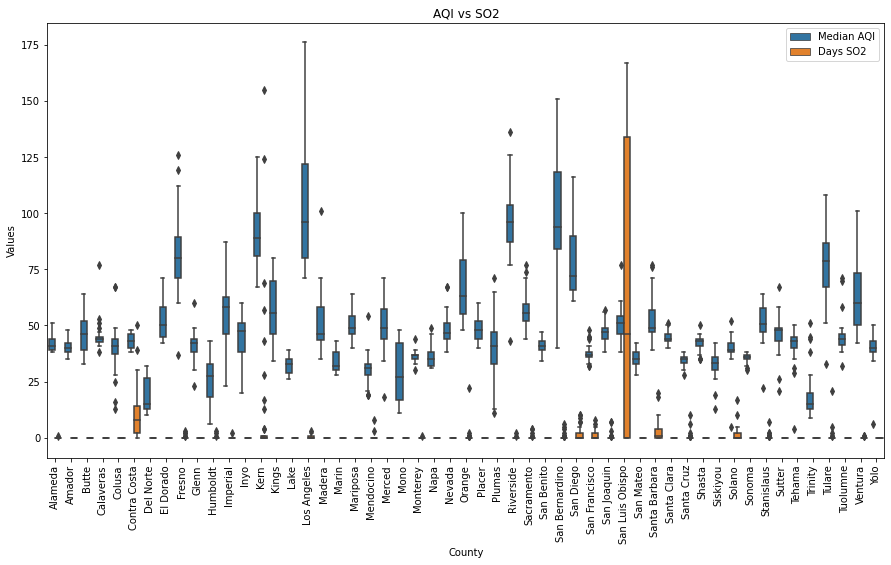

In [9]:
# melt to give us County vs Median AQI, Days SO2
temp = pd.melt(cali[['County', 'Median AQI', 'Days SO2']],
                        id_vars='County', 
                        var_name='Measures', 
                        value_vars=['Median AQI', 'Days SO2'],
                        value_name='Target')

plt.subplots(figsize=(15, 8))
sns.boxplot(x='County', y='Target', hue='Measures', data=temp.sort_values('County'))
plt.xticks(rotation='vertical')
plt.ylabel('Values')
plt.xlabel('County')
plt.title('AQI vs SO2')
plt.legend(loc='upper right');

Lets normalize the day measures by the number of day in which measures were taken ('Days AQI')

In [ ]:
aqi_df_norm = aqi_df.copy()
# Good Days, Moderate Days, Unhealthy for Sensitive Groups Days, Unhealthy Days, Very Unhealthy Days, Hazardous Days
aqi_df_norm.iloc[:,4:10] = aqi_df_norm.iloc[:,4:10].apply(lambda x: x/aqi_df.iloc[:,3], axis=0)
# Days CO, Days NO2, Days Ozone, Days SO2, Days PM2.5, Days PM10
aqi_df_norm.iloc[:,13:19] = aqi_df_norm.iloc[:,13:19].apply(lambda x: x/aqi_df.iloc[:,3], axis=0)
aqi_df_norm.sample(10)


Lets test the normalized data by overlaying it on the raw data. 

In [ ]:
#temp = aqi_df[aqi_df['State'] == 'California']['Days Ozone'] / aqi_df[aqi_df['State'] == 'California']['Days with AQI']
temp = aqi_df[aqi_df['State'] == 'California']['Days Ozone']
temp_norm = aqi_df_norm[aqi_df['State'] == 'California']['Days Ozone']

plt.hist(temp, histtype='step', bins=50, color='red', alpha=0.5, label='raw', linewidth=2)
plt.hist(temp_norm, bins=50, alpha=0.5, label='normalized', linewidth=2)
plt.legend(loc='upper right')
plt.show();

<span style="background-color:rgba(255, 0, 0, 0.2);">Warning: Days SO2 has 23416 (68.5%) zeros</span>

In [ ]:
(aqi_df['Days SO2']
    .sort_values(ascending=False)
    .plot(kind='hist', logy=True, bins=100, figsize=(15, 5), title=' Days SO2 (log y)'))
plt.xlabel('Days');

<span style="background-color:rgba(255, 0, 0, 0.2);">Warning: Days PM2.5 has 17472 (51.1%) zeros</span>

In [ ]:
(aqi_df['Days PM2.5']
    .sort_values(ascending=False)
    .plot(kind='hist', logy=True, bins=100, figsize=(15, 5), title='Days PM2.5 (log y)'))
plt.xlabel('Days');

<span style="background-color:rgba(255, 0, 0, 0.2);">Warning: Days PM10 has 21396 (62.6%) zeros</span>

In [ ]:
(aqi_df['Days PM10']
    .sort_values(ascending=False)
    .plot(kind='hist', logy=True, bins=100, figsize=(15, 5), title='Days PM10 (log y)'))
plt.xlabel('Days');